In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
import hdbscan
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [10]:
df = pd.read_csv("loans_Tarea9.csv")
X = df
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
28633,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30
28634,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19
28635,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28
28636,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26


In [11]:
numerical = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = X.select_dtypes(include=['object']).columns.tolist()

preproc = ColumnTransformer(
    [("num", StandardScaler(), numerical), ("cat", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical)]
)
X = preproc.fit_transform(X)

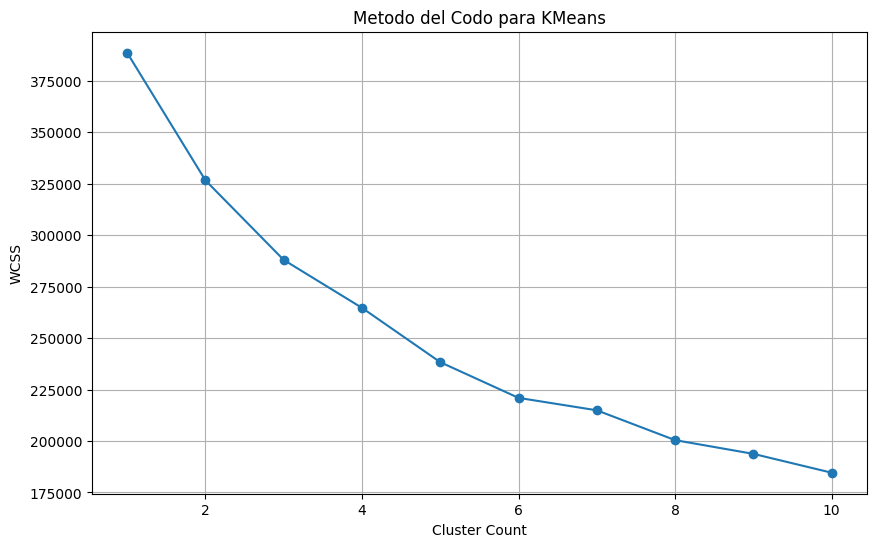

In [12]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=254)
    etiquetas = kmeans.fit_predict(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Cluster Count")
plt.ylabel("WCSS")
plt.title("Metodo del Codo para KMeans")
plt.grid()


In [13]:
#K-means
k = 4
kmeans = KMeans(n_clusters=k, random_state=254)
kmeans_etiquetas = kmeans.fit_predict(X)

In [14]:
#HDBSCAN
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=8)
hdbscan_etiquetas = hdbscan_model.fit_predict(X)

c:\Users\nicon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\nicon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## Clustering sin Reducción

In [15]:
tsne = TSNE(n_components=2, random_state=254).fit_transform(X)

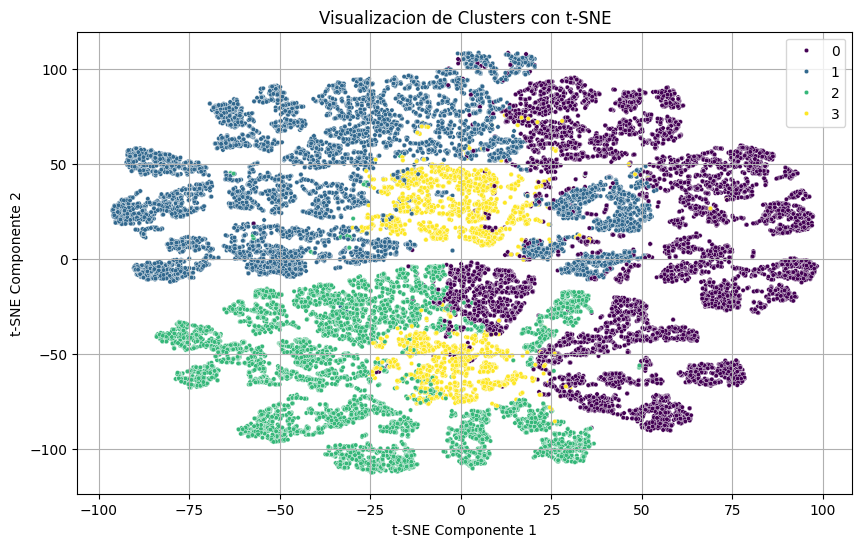

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=kmeans_etiquetas, palette="viridis", s=10)
plt.xlabel("t-SNE Componente 1")
plt.ylabel("t-SNE Componente 2")
plt.title("Visualizacion de Clusters con t-SNE")
plt.grid()
plt.show()

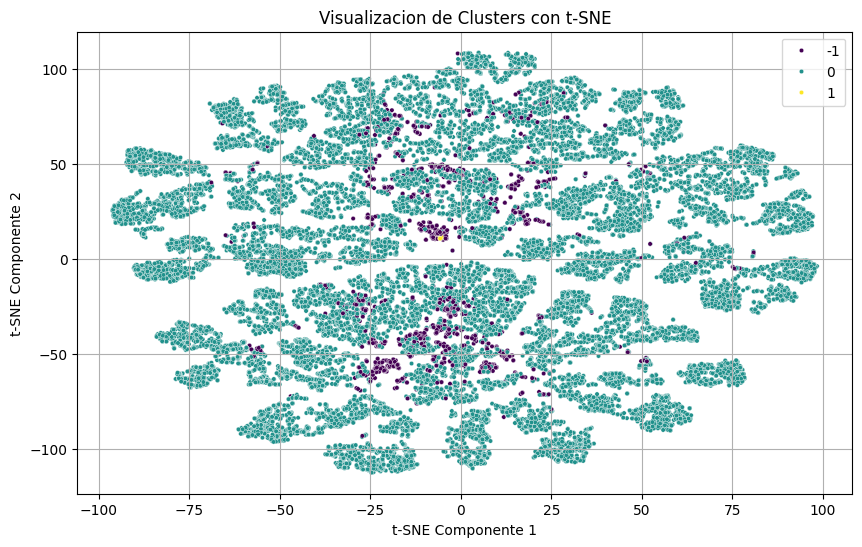

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=hdbscan_etiquetas, palette="viridis", s=10)
plt.xlabel("t-SNE Componente 1")
plt.ylabel("t-SNE Componente 2")
plt.title("Visualizacion de Clusters con t-SNE")
plt.grid()
plt.show()

## Clustering con reducción

In [46]:
tsne_reducir = TSNE(n_components=2, random_state=254).fit_transform(X)

ValueError: could not convert string to float: 'Graduation'

In [ ]:
kmeans_reducido = KMeans(n_clusters=k, random_state=254)
kmeans_reducido_etiquetas = kmeans_reducido.fit_predict(tsne_reducir)

In [ ]:
hdbscan_model_reducido = hdbscan.HDBSCAN(min_cluster_size=8)
hdbscan_etiquetas_reducido = hdbscan_model_reducido.fit_predict(tsne_reducir)

c:\Users\nicon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\nicon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


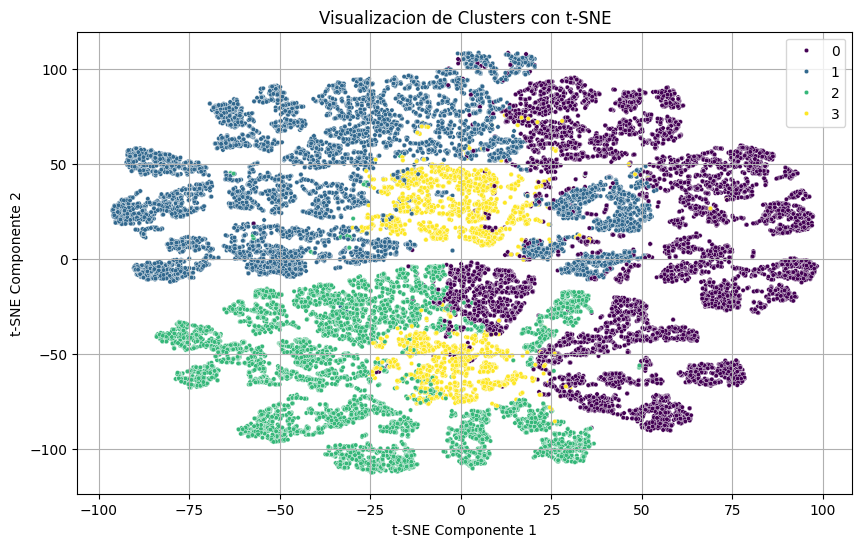

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=kmeans_etiquetas, palette="viridis", s=10)
plt.xlabel("t-SNE Componente 1")
plt.ylabel("t-SNE Componente 2")
plt.title("Visualizacion de Clusters con t-SNE")
plt.grid()
plt.show()

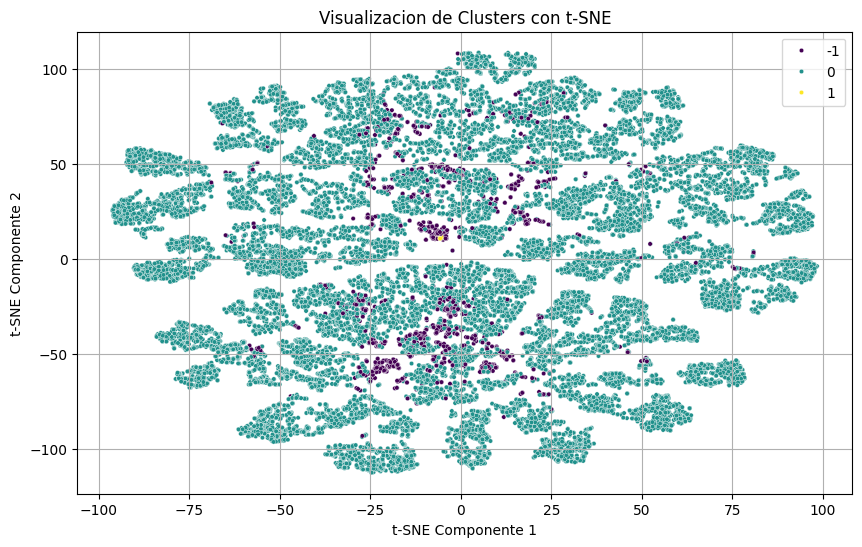

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=hdbscan_etiquetas, palette="viridis", s=10)
plt.xlabel("t-SNE Componente 1")
plt.ylabel("t-SNE Componente 2")
plt.title("Visualizacion de Clusters con t-SNE")
plt.grid()
plt.show()

In [ ]:
silhouette_score(X, kmeans_etiquetas) #0.164

0.16399832875521408

In [ ]:
silhouette_score(X, kmeans_reducido_etiquetas) #0.137

0.13699909898355742

In [ ]:
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=8)
hdbscan_etiquetas = hdbscan_model.fit_predict(X[:400])

c:\Users\nicon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\nicon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


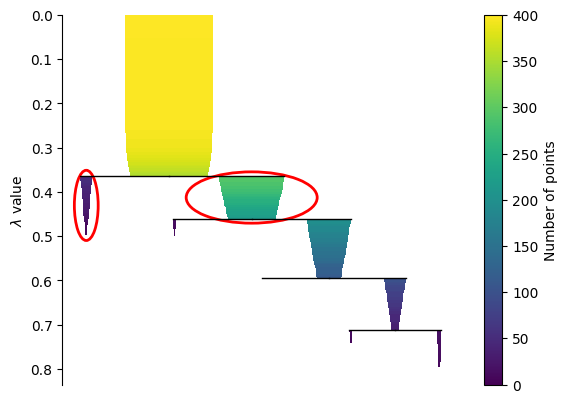

In [ ]:
hdbscan_model.condensed_tree_.plot(select_clusters=True)
plt.show()

In [ ]:
df8 = pd.read_csv("customers_Tarea8.csv")

X8 = df8.drop(columns=["Response"])

In [ ]:
numerical = X8.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = X8.select_dtypes(include=['object']).columns.tolist()

preproc = ColumnTransformer([
    ("num",
        Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]),
        numerical
    ),
    ("cat",
        Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
        ]),
        categorical
    ),
])

X8_preproc = preproc.fit_transform(X8)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=254)
df8["pseudo_label"] = kmeans.fit_predict(X8_preproc)

In [ ]:
X = X8
y = df8["pseudo_label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=254, stratify=y)

model = Pipeline([
    ("preproc", preproc),
    ("clasificador", LogisticRegression(max_iter=1000, random_state=254))
])

model.fit(X_train, y_train)

c:\Users\nicon\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,steps,"[('preproc', ...), ('clasificador', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average="weighted", zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average="weighted", zero_division=0))
print("F1-score:", f1_score(y_test, y_pred, average="weighted", zero_division=0))

print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte completo:\n", classification_report(y_test, y_pred, zero_division=0))


Accuracy: 0.90625
Precision: 0.9120307125079686
Recall: 0.90625
F1-score: 0.9065686186875531

Matriz de confusión:
 [[ 94   0  11   6]
 [  0  89  10   2]
 [  3   0 114   0]
 [  5   2   3 109]]

Reporte completo:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88       111
           1       0.98      0.88      0.93       101
           2       0.83      0.97      0.89       117
           3       0.93      0.92      0.92       119

    accuracy                           0.91       448
   macro avg       0.91      0.90      0.91       448
weighted avg       0.91      0.91      0.91       448



### El modelo entrenado con las pseudo-etiquetas funcionó correctamente, obteniendo un accuracy cercano al 91% y métricas equilibradas entre las clases. La matriz de confusión muestra que la mayoría de las predicciones fueron correctas, por lo que los valores obtenidos indican un desempeño sólido y coherente con la estructura generada por los cluster.